<a href="https://colab.research.google.com/github/Park-SungUk/Studying-alone-Machine-Learning-Deep-Learning/blob/main/Chapter03_%ED%9A%8C%EA%B7%80_%EC%95%8C%EA%B3%A0%EB%A6%AC%EC%A6%98%EA%B3%BC_%EB%AA%A8%EB%8D%B8_%EA%B7%9C%EC%A0%9C.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np

In [ ]:
#1. 데이터 불러오기
df = pd.read_csv('https://bit.ly/perch_csv_data')
perch_full = df.to_numpy()
perch_weight = np.array(
    [5.9, 32.0, 40.0, 51.5, 70.0, 100.0, 78.0, 80.0, 85.0, 85.0, 
     110.0, 115.0, 125.0, 130.0, 120.0, 120.0, 130.0, 135.0, 110.0, 
     130.0, 150.0, 145.0, 150.0, 170.0, 225.0, 145.0, 188.0, 180.0, 
     197.0, 218.0, 300.0, 260.0, 265.0, 250.0, 250.0, 300.0, 320.0, 
     514.0, 556.0, 840.0, 685.0, 700.0, 700.0, 690.0, 900.0, 650.0, 
     820.0, 850.0, 900.0, 1015.0, 820.0, 1100.0, 1000.0, 1100.0, 
     1000.0, 1000.0]
     )
print(perch_full)

[[ 8.4   2.11  1.41]
 [13.7   3.53  2.  ]
 [15.    3.82  2.43]
 [16.2   4.59  2.63]
 [17.4   4.59  2.94]
 [18.    5.22  3.32]
 [18.7   5.2   3.12]
 [19.    5.64  3.05]
 [19.6   5.14  3.04]
 [20.    5.08  2.77]
 [21.    5.69  3.56]
 [21.    5.92  3.31]
 [21.    5.69  3.67]
 [21.3   6.38  3.53]
 [22.    6.11  3.41]
 [22.    5.64  3.52]
 [22.    6.11  3.52]
 [22.    5.88  3.52]
 [22.    5.52  4.  ]
 [22.5   5.86  3.62]
 [22.5   6.79  3.62]
 [22.7   5.95  3.63]
 [23.    5.22  3.63]
 [23.5   6.28  3.72]
 [24.    7.29  3.72]
 [24.    6.38  3.82]
 [24.6   6.73  4.17]
 [25.    6.44  3.68]
 [25.6   6.56  4.24]
 [26.5   7.17  4.14]
 [27.3   8.32  5.14]
 [27.5   7.17  4.34]
 [27.5   7.05  4.34]
 [27.5   7.28  4.57]
 [28.    7.82  4.2 ]
 [28.7   7.59  4.64]
 [30.    7.62  4.77]
 [32.8  10.03  6.02]
 [34.5  10.26  6.39]
 [35.   11.49  7.8 ]
 [36.5  10.88  6.86]
 [36.   10.61  6.74]
 [37.   10.84  6.26]
 [37.   10.57  6.37]
 [39.   11.14  7.49]
 [39.   11.14  6.  ]
 [39.   12.43  7.35]
 [40.   11.93

In [ ]:
#2. 데이터 쪼개기
from sklearn.model_selection import train_test_split
train_input, test_input, train_target, test_target = train_test_split(perch_full, perch_weight, random_state = 42)

In [ ]:
#3. 변수 변환기
from sklearn.preprocessing import PolynomialFeatures
poly = PolynomialFeatures(include_bias=False)

#예시 - poly.fit([[2,3]])
#print(poly.transform([[2,3]])) #: 2,3으로 만드는 변수변환기 : 1~3**2까지/include_bias = False : 1은 제외
#poly.fit([[2,3]]) #괄호 2개

poly.fit(train_input)
train_poly = poly.transform(train_input)
print(train_poly.shape) #numpy array : .shape 가능 #여러개의 변수 만들기
poly.get_feature_names_out() #각각 변환기 통한 변수명 알기
test_poly = poly.transform(test_input) #test input도 똑같이 변환

(42, 9)


In [ ]:
#4. 모델 훈련하기
from sklearn.linear_model import LinearRegression
lr = LinearRegression() #1) 모델적고
lr.fit(train_poly, train_target) #2) 훈련하고
print(lr.score(train_poly, train_target)) #3)점수매기기
print(lr.score(test_poly, test_target))

0.9903183436982125
0.9714559911594111


In [ ]:
#sub) 변수변환시 5제곱까지 만들려면
poly = PolynomialFeatures(include_bias=False, degree=5) #5제곱까지
poly.fit(train_input) #1) poly 훈련
train_poly = poly.transform(train_input) #2) 변환
test_poly = poly.transform(test_input)

lr.fit(train_poly, train_target)
print(train_poly.shape) #55개의 변수 생성
poly.get_feature_names_out()

(42, 55)


array(['x0', 'x1', 'x2', 'x0^2', 'x0 x1', 'x0 x2', 'x1^2', 'x1 x2',
       'x2^2', 'x0^3', 'x0^2 x1', 'x0^2 x2', 'x0 x1^2', 'x0 x1 x2',
       'x0 x2^2', 'x1^3', 'x1^2 x2', 'x1 x2^2', 'x2^3', 'x0^4', 'x0^3 x1',
       'x0^3 x2', 'x0^2 x1^2', 'x0^2 x1 x2', 'x0^2 x2^2', 'x0 x1^3',
       'x0 x1^2 x2', 'x0 x1 x2^2', 'x0 x2^3', 'x1^4', 'x1^3 x2',
       'x1^2 x2^2', 'x1 x2^3', 'x2^4', 'x0^5', 'x0^4 x1', 'x0^4 x2',
       'x0^3 x1^2', 'x0^3 x1 x2', 'x0^3 x2^2', 'x0^2 x1^3',
       'x0^2 x1^2 x2', 'x0^2 x1 x2^2', 'x0^2 x2^3', 'x0 x1^4',
       'x0 x1^3 x2', 'x0 x1^2 x2^2', 'x0 x1 x2^3', 'x0 x2^4', 'x1^5',
       'x1^4 x2', 'x1^3 x2^2', 'x1^2 x2^3', 'x1 x2^4', 'x2^5'],
      dtype=object)

In [ ]:
print(lr.score(train_poly, train_target)) #Overfitting!
print(lr.score(test_poly, test_target))

0.9999999999996433
-144.40579436844948


In [ ]:
#5. 규제
from sklearn.preprocessing import StandardScaler
ss = StandardScaler() #1. 모델정의(표준화)
ss.fit(train_poly) #2. 훈련
train_scaled = ss.transform(train_poly) #3. 변환
test_scaled = ss.transform(test_poly)

In [ ]:
#5-1. Ridge Regression
from sklearn.linear_model import Ridge
ridge = Ridge()
ridge.fit(train_scaled, train_target)
print(ridge.score(train_scaled, train_target))
print(ridge.score(train_scaled, train_target)) #과적합 방지 성공

0.9896101671037343
0.9896101671037343


In [ ]:
#hyperparameter 인 alpha값 정하기 - 모델튜닝
import matplotlib.pyplot as plt
train_score=[]
test_score=[]
alpha_list = [0.001, 0.01, 0.1, 1, 10, 100]
for alpha in alpha_list:
  ridge = Ridge(alpha=alpha)
  ridge.fit(train_scaled, train_target) #릿지모델 훈련
  train_score.append(ridge.score(train_scaled, train_target))
  test_score.append(ridge.score(test_scaled, test_target))

[0.9930455252088248, 0.991780998125052, 0.9903815817570367, 0.9896101671037343, 0.988728468997471, 0.9841843235774494]


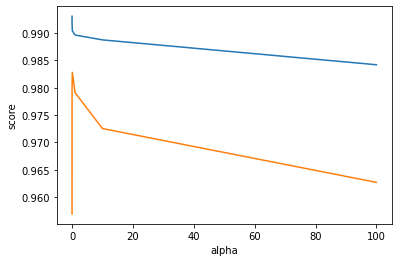

In [ ]:
plt.plot(alpha_list, train_score) #그냥 보면 안보임 - 로그써주자
plt.plot(alpha_list, test_score)
plt.xlabel('alpha')
plt.ylabel('score')
plt.show()

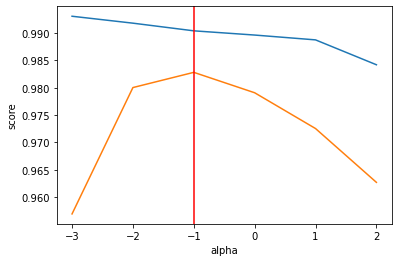

In [ ]:
plt.plot(np.log10(alpha_list), train_score) #그냥 보면 안보임 - 로그써주자
plt.plot(np.log10(alpha_list), test_score)
plt.xlabel('alpha')
plt.ylabel('score')
plt.axvline(x=-1, color = 'r') #plt.axvline : 선그리기 y는 axhline
plt.show() #alpha=-1 (0.1)일때 가장 test적합도 높음음

In [ ]:
#최종 모델
ridge = Ridge(alpha=0.1)
ridge.fit(train_scaled, train_target)
print(ridge.score(train_scaled, train_target))
print(ridge.score(test_scaled, test_target))

0.9903815817570367
0.9827976465386928


In [ ]:
#5.2 - Lasso Regression
from sklearn.linear_model import Lasso
lasso = Lasso()
lasso.fit(train_scaled, train_target)
print(lasso.score(train_scaled, train_target))
print(lasso.score(test_scaled, test_target))

0.989789897208096
0.9800593698421883


In [ ]:
#hyperparameter 인 alpha값 정하기 - 모델튜닝
train_score=[]
test_score=[]
alpha_list = [0.001, 0.01, 0.1, 1, 10, 100]
for alpha in alpha_list:
  lasso = Lasso(alpha=alpha)
  lasso.fit(train_scaled, train_target) #라쏘모델 훈련
  train_score.append(lasso.score(train_scaled, train_target))
  test_score.append(lasso.score(test_scaled, test_target))

/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.336e+04, tolerance: 5.183e+02
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.025e+04, tolerance: 5.183e+02
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 8.062e+02, tolerance: 5.183e+02

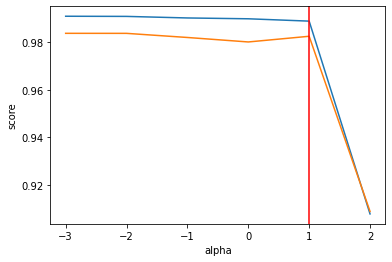

In [ ]:
plt.plot(np.log10(alpha_list), train_score) #그냥 보면 안보임 - 로그써주자
plt.plot(np.log10(alpha_list), test_score)
plt.xlabel('alpha')
plt.ylabel('score')
plt.axvline(x=1, color = 'r')
plt.show() #alpha=10

In [ ]:
#최종 모델
lasso = Lasso(alpha=10)
lasso.fit(train_scaled, train_target)
print(lasso.score(train_scaled, train_target))
print(lasso.score(test_scaled, test_target))

0.9888067471131867
0.9824470598706695


In [ ]:
print(np.sum(lasso.coef_==0)) #삭제한 변수개수 : 40개 (총 15개만 사용한)

40
